<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Sentiment Analysis for Twitter Data</h1>

<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Problem Statement</h1>
<li>Study the subjects of recent tweets about the vaccine made in collaboration by Pfizer and BioNTech, perform various NLP tasks on this data source



<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">About Data Set</h1>
<li>Data is collected from recent tweets about Pfizer and BioNTech vaccine.
<li>The data is collected using tweepy Python package to access Twitter API.



<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Importing Libraries</h1>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv


In [2]:
#For basic table operation
import pandas as pd

#For work with arrays
import numpy as np

#For find pattern in text
import re

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

#For processing textial data
from textblob import TextBlob

#For Tokenizing segments
from nltk.tokenize import word_tokenize

#For Stemming text
from nltk.stem import PorterStemmer

#For removing StopWords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#For Plotting Words
from wordcloud import WordCloud

# Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

#To split data into train and test
from sklearn.model_selection import train_test_split

#For fitting model
from sklearn.linear_model import LogisticRegression

#For evaluation of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#For Hyper-tuning model
from sklearn.model_selection import GridSearchCV


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv")
df.head(4)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [5]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [6]:
# Extracting only Text attributs for analysis
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [7]:
#visualizing Raw data we have from Tweetr
print(text_df["text"].iloc[0],"\n")
print(text_df["text"].iloc[1],"\n")
print(text_df["text"].iloc[2],"\n")
print(text_df["text"].iloc[3],"\n")
print(text_df["text"].iloc[4],"\n")
print(text_df["text"].iloc[5],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 

Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN 




<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Data Preprocessing</h1>

In [8]:
def data_processing(text):
    text = text.lower()     #Converting to text to lowercase
    text = re.sub(r'https\S+|www\S+https\S+','',text,flags=re.MULTILINE)   #Removing URL
    text = re.sub(r'\@w+|\#','',text)         #Removing hashtags
    text = re.sub(r'[^\w\s]','',text)         #Removing hashtags
    text_tokens = word_tokenize(text)         #Getting tokens
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [9]:
# Applying Data Processing function
text_df.text = text_df["text"].apply(data_processing)

In [10]:
# Removing Duplicates if any
text_df = text_df.drop_duplicates('text')

In [11]:
# Performing Stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [12]:
text_df["text"] = text_df["text"].apply(lambda x: stemming(x))

In [13]:
#visualizing Processed text
print(text_df["text"].iloc[0],"\n")
print(text_df["text"].iloc[1],"\n")
print(text_df["text"].iloc[2],"\n")
print(text_df["text"].iloc[3],"\n")
print(text_df["text"].iloc[4],"\n")
print(text_df["text"].iloc[5],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 

anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding 



In [14]:
#Checking data shape
print("Shape of data after processing:",text_df["text"].shape)

Shape of data after processing: (10543,)


In [15]:
#calculating polarity for categorizing text 
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [16]:
text_df["polarity"] = text_df["text"].apply(polarity)
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [17]:
#  Adding Sentiment to the data frame
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [18]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head(10)

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.000,Neutral
1,world wrong side history year hopefully bigges...,-0.500,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,Neutral
3,facts immutable senator even youre ethically s...,0.100,Positive
4,explain need vaccine borisjohnson matthancock ...,0.000,Neutral
5,anyone useful adviceguidance whether covid vac...,0.400,Positive
6,bit sad claim fame success vaccination patriot...,-0.100,Negative
7,many bright days 2020 best 1 bidenharris winni...,0.675,Positive
8,covid vaccine getting covidvaccine covid19 pfi...,0.000,Neutral
9,covidvaccine states start getting covid19vacci...,0.000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

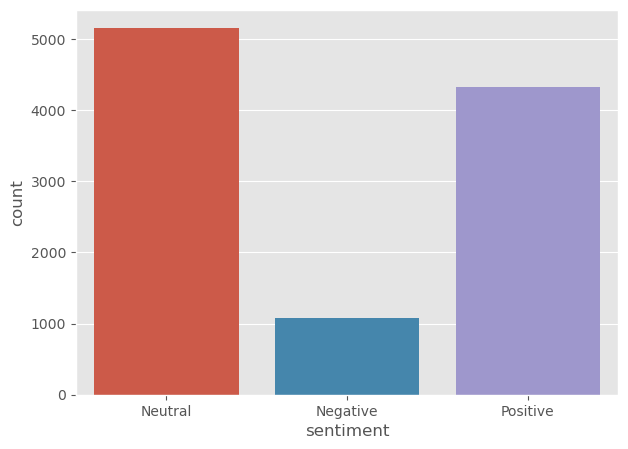

In [19]:
#Visualizing the Sentiment
fig = plt.figure(figsize=(7,5))
sns.countplot(x="sentiment",data=text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

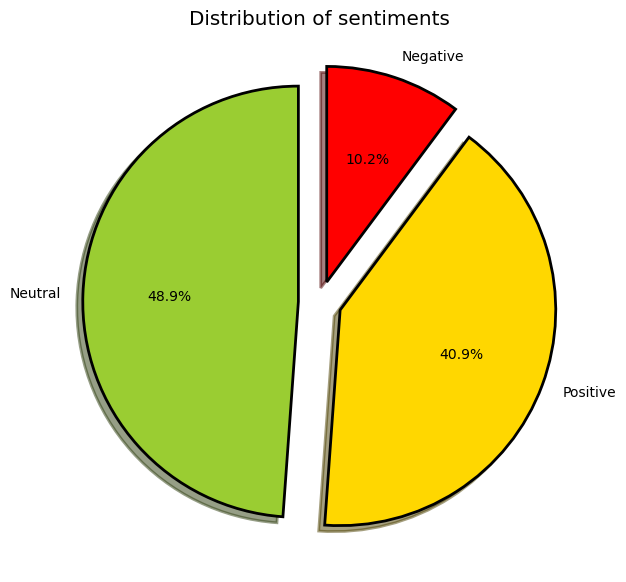

In [20]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [21]:
#Visulaizing Top 5 positive Sentiments
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
9317,best way get merrygoround pfizer pfizerbiontec...,1.0,Positive
2340,applying emotion pfizerbiontech based best evi...,1.0,Positive
6295,pfizer jab morning efficient wellorganised tha...,1.0,Positive
5041,get art printed awesome products support redbu...,1.0,Positive
1055,already vaccinated getting vaccine soon plan t...,1.0,Positive


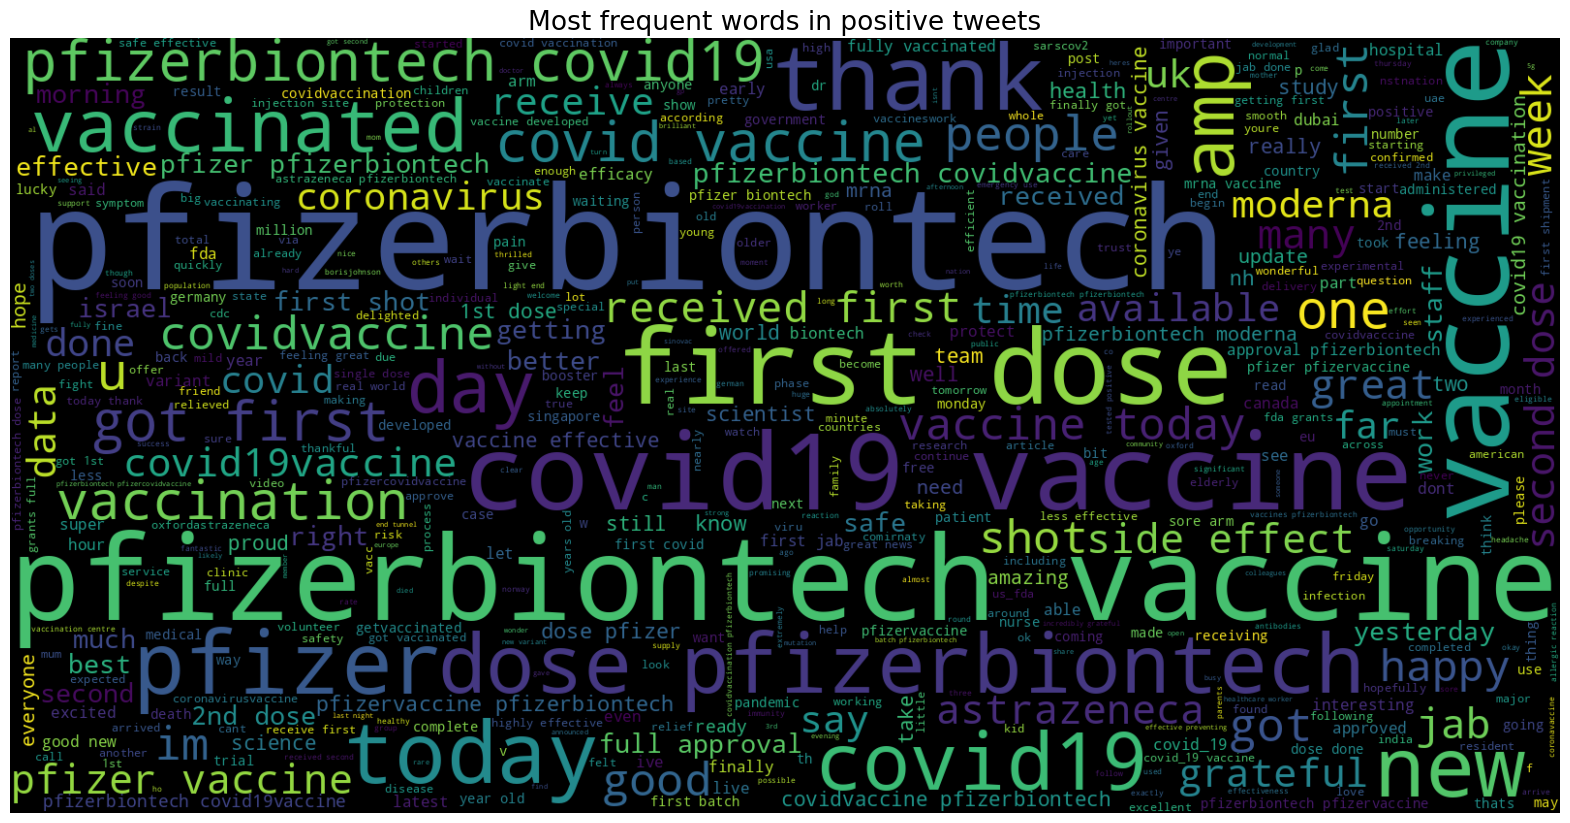

In [22]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [23]:
#Visualizing Negative Words
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


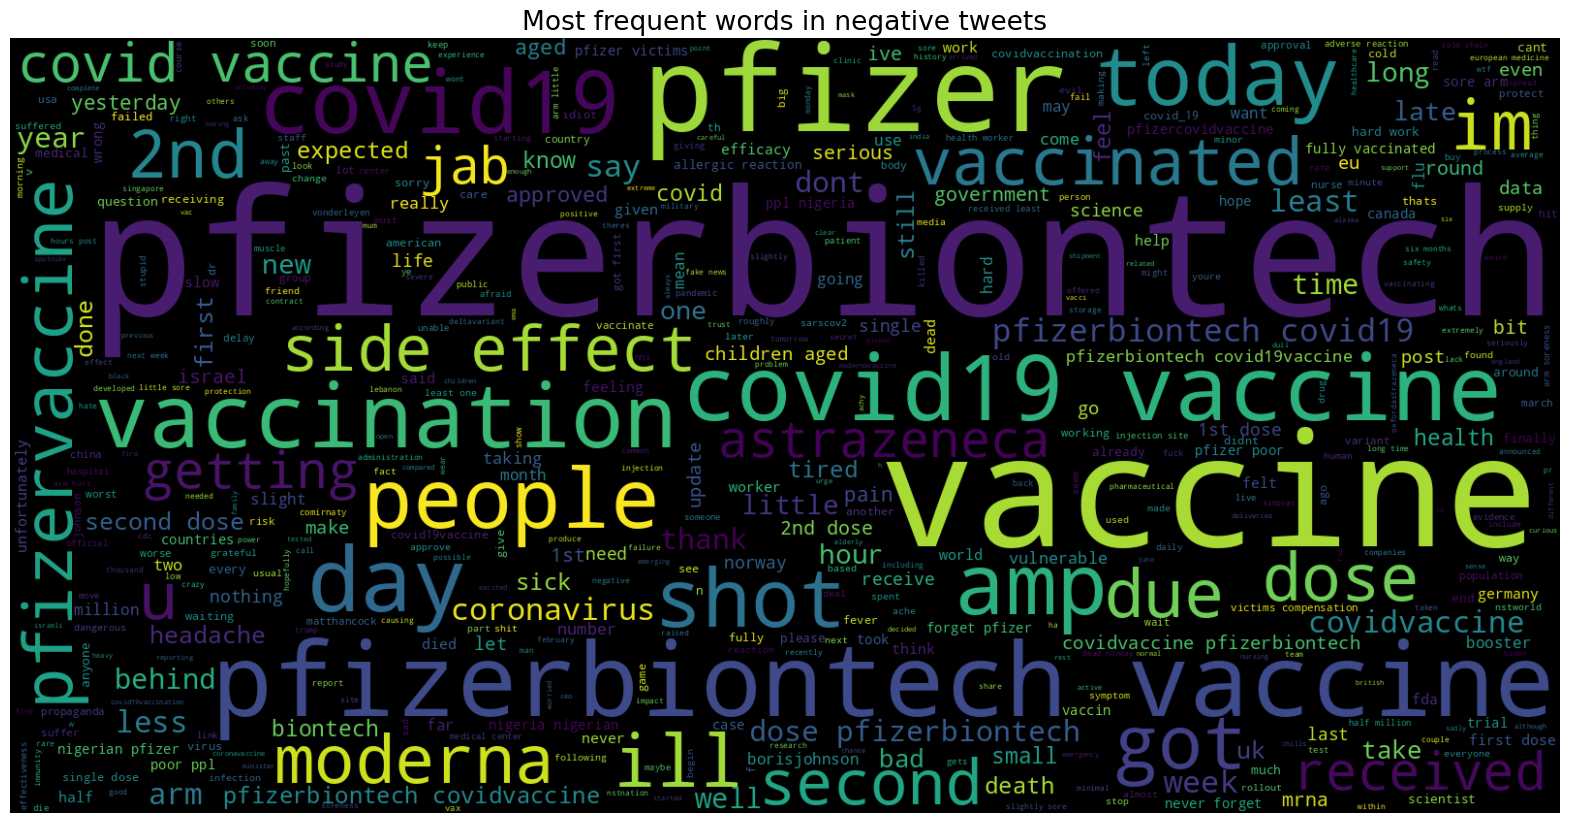

In [24]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [25]:
#Visualizing Neutral Words
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7347,anyone else feel like framing vaccine card pfi...,0.0,Neutral
7458,looking forward getting second pfizer shot any...,0.0,Neutral
7454,never thought id running diff vaccine modernav...,0.0,Neutral
7453,john___m dont get choose one person know asked...,0.0,Neutral


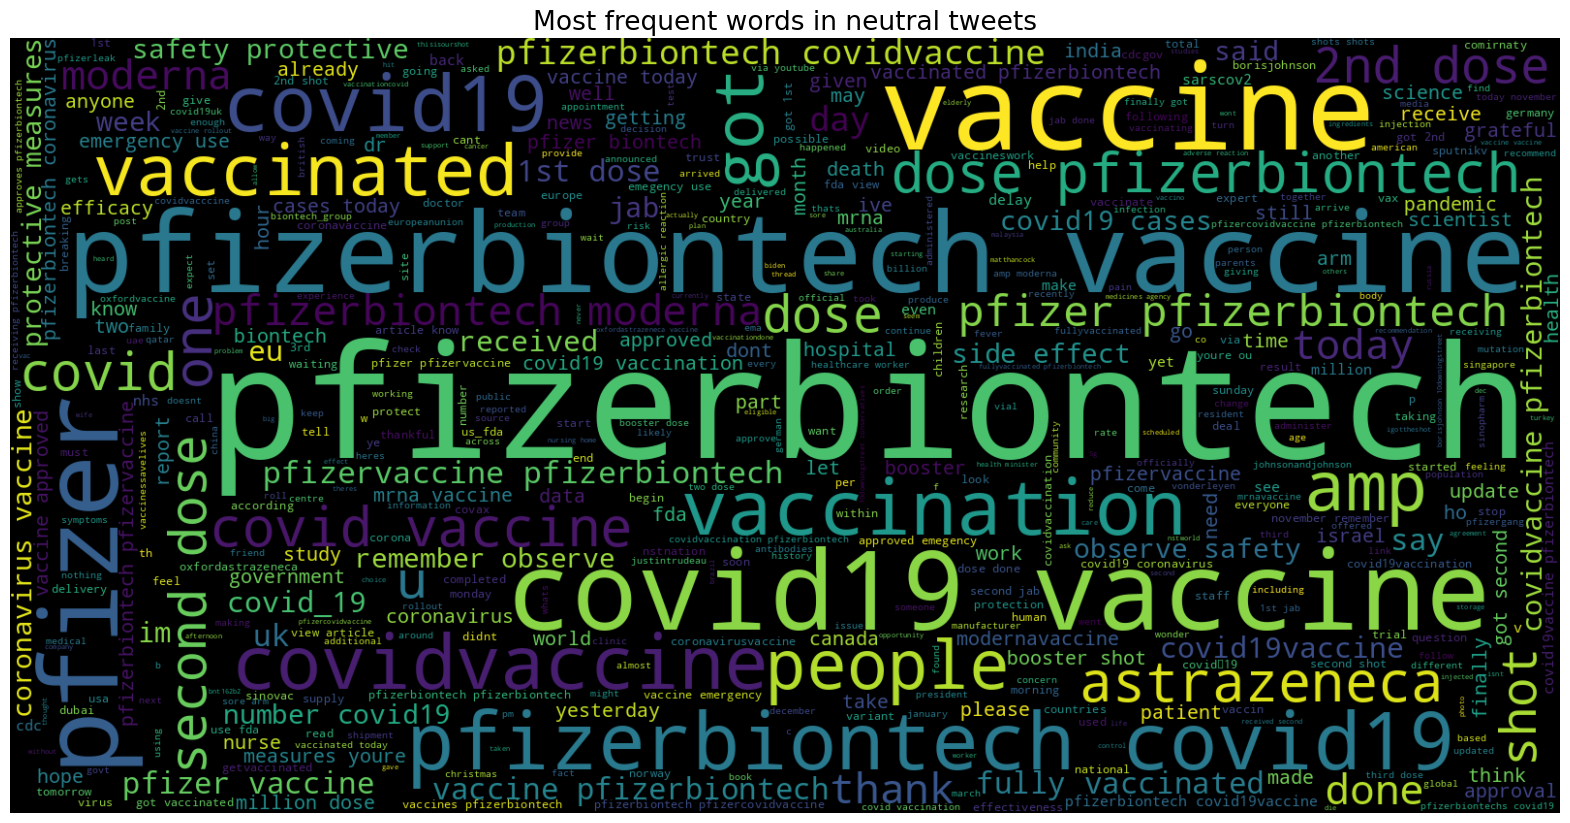

In [26]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()


<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Vectorizing Data</h1>


In [27]:
# Performing Vectorizing to crate bigram model
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [28]:
#Getting Features
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 78583

First 20 features:
 ['000' '000 doses' '000 initial' '000 people' '000 vaccines' '0000001'
 '0000001 covid19' '0011' '0011 abt' '004' '004 covid' '004 israelis' '01'
 '01 getting' '01 june' '01 november' '01aug2021' '01aug2021 doublevaxxed'
 '02' '02 175']



<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Model Development</h1>

In [29]:
#seperating Independent and Depentent Variables and tranform X data
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [30]:
# Splitting data with test 20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
#Checking shape of train and test data
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8434, 78583)
Size of y_train: (8434,)
Size of x_test: (2109, 78583)
Size of y_test: (2109,)


In [32]:
import warnings
warnings.filterwarnings('ignore')

#Training logisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.64%


In [33]:
#Confusion matrix
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  72  116   38]
 [   4 1008    9]
 [   8  149  705]]


              precision    recall  f1-score   support

    Negative       0.86      0.32      0.46       226
     Neutral       0.79      0.99      0.88      1021
    Positive       0.94      0.82      0.87       862

    accuracy                           0.85      2109
   macro avg       0.86      0.71      0.74      2109
weighted avg       0.86      0.85      0.83      2109



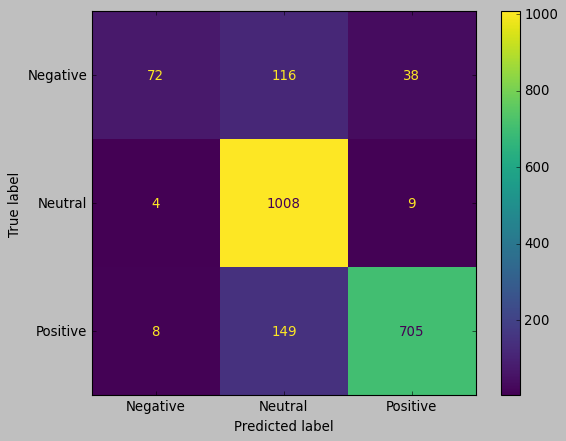

In [34]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Tuning Model</h1>

In [35]:
#Lets perform Hyper-Parameter to modulate performance of model

param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}                  #Taking random  alpha values
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [36]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [37]:
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.92%


# we can see increase in accurancy by impementing hyperparameter

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:lightgreen;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:25px">

<h1 style="color:black;font-size:20px;font-family:Georgia;text-align:center;">👨‍💻<strong>Thank you for Joining, Happy Kaggling</strong>👨‍💻</h1>